In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [2]:
import sklearn
import numpy
import pandas

print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)

scikit-learn: 1.6.1
numpy: 2.2.1
pandas: 2.2.3


In [3]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
data.shape

(2200, 8)

In [5]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

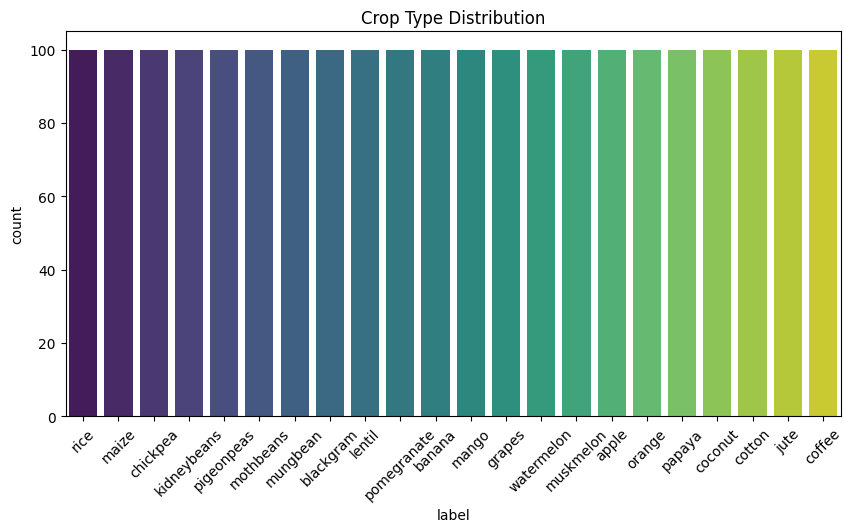

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Crop Type Distribution')
plt.show()

Classes are Balanced

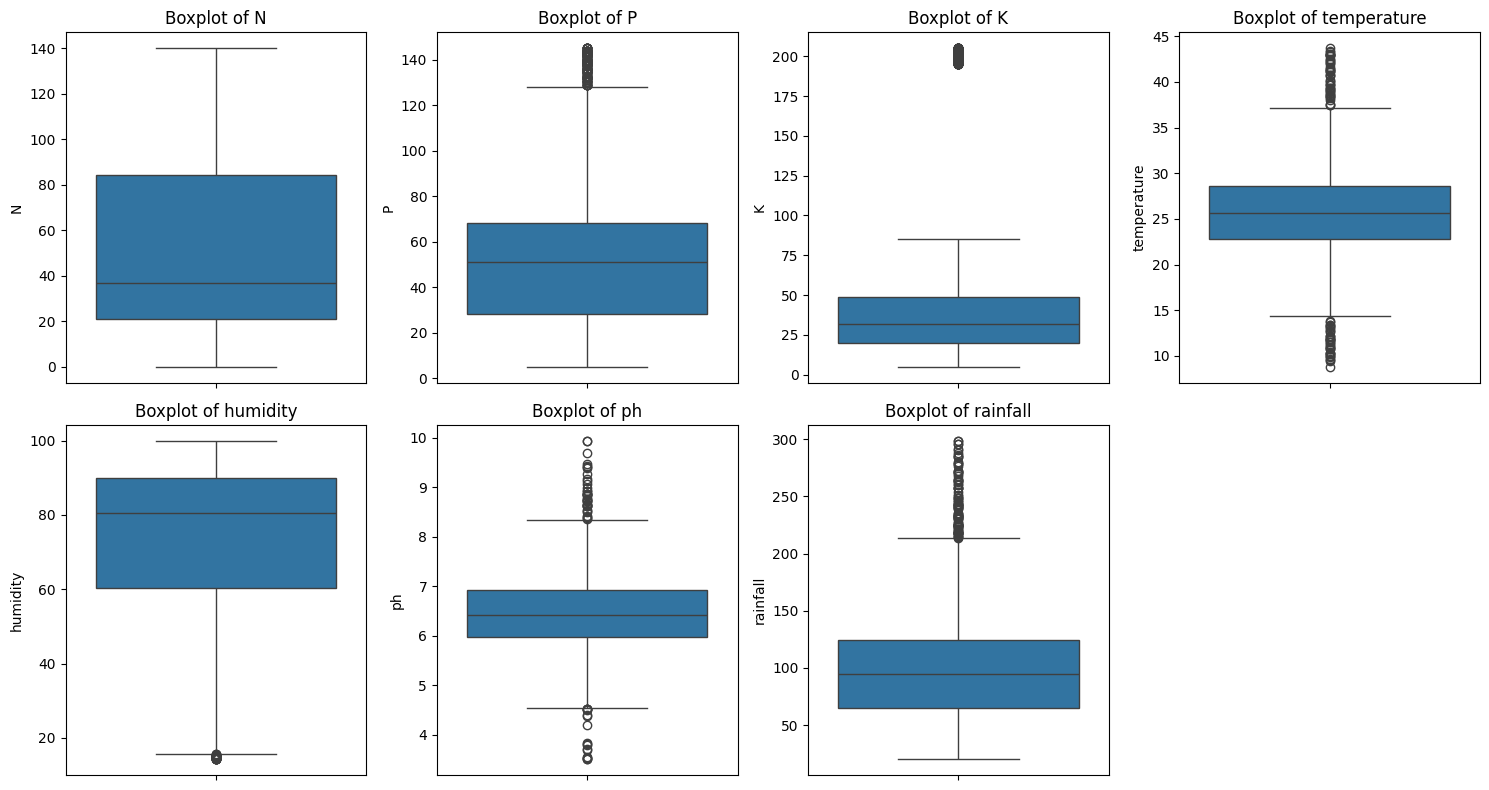

In [8]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
#Handle Outliers
#IQR method to identify and cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

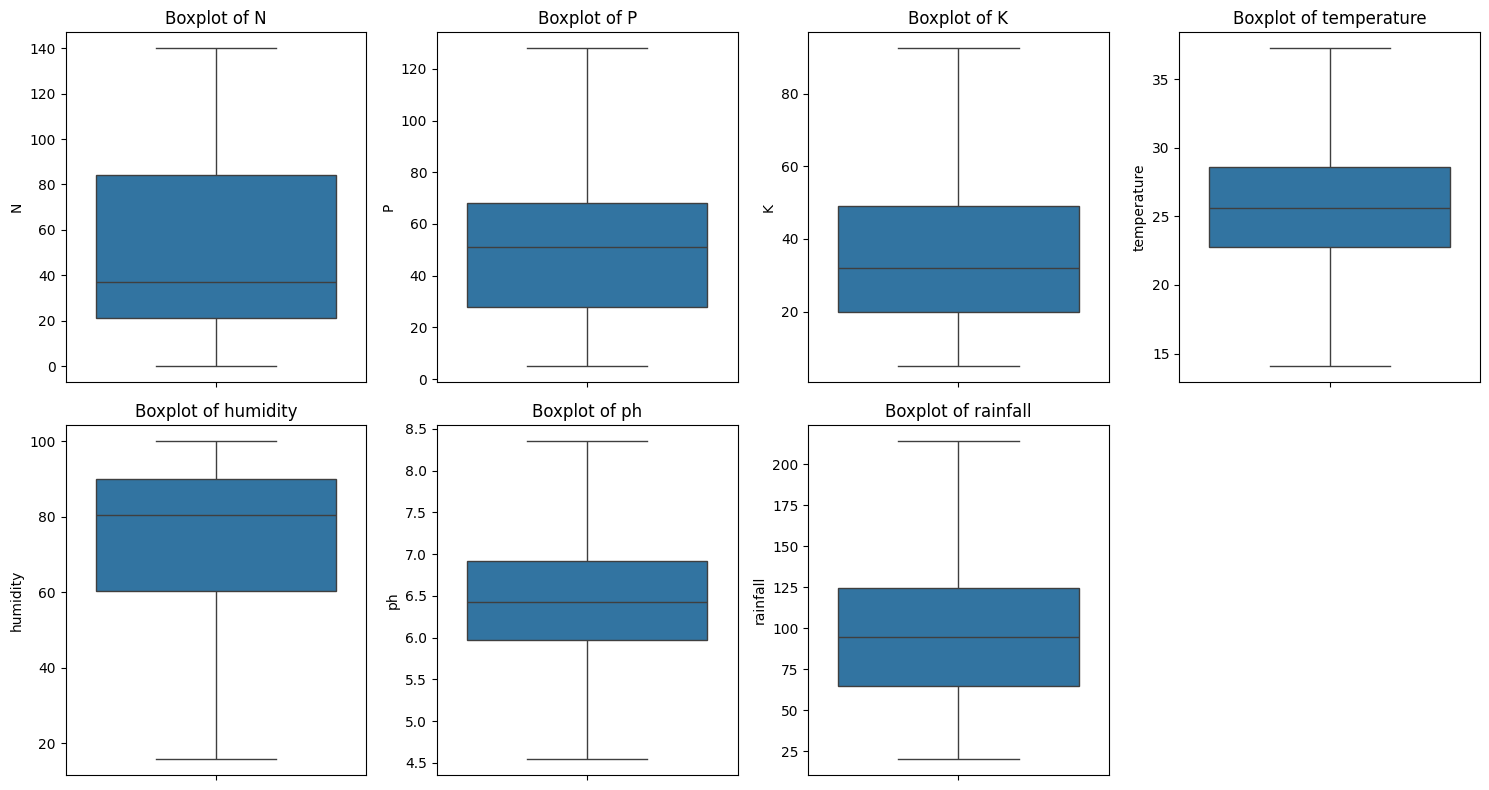

In [11]:
# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [12]:
# Histograms for the numerical cols
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].hist(bins=15, figsize=(15, 10))
plt.show()

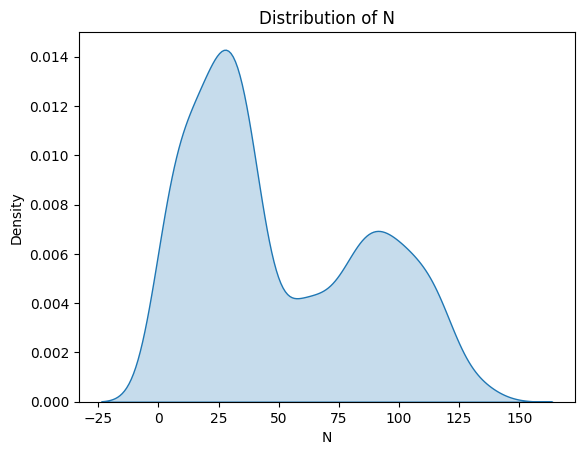

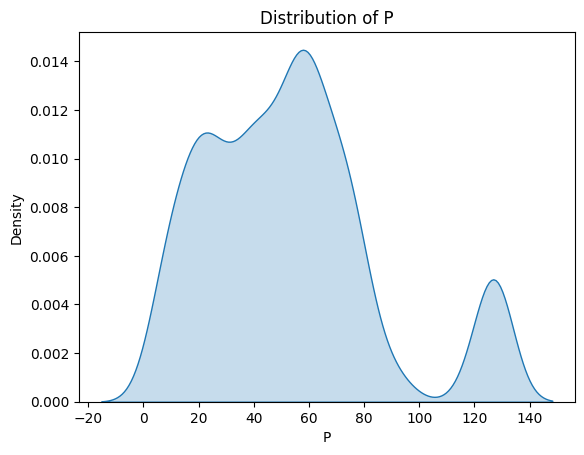

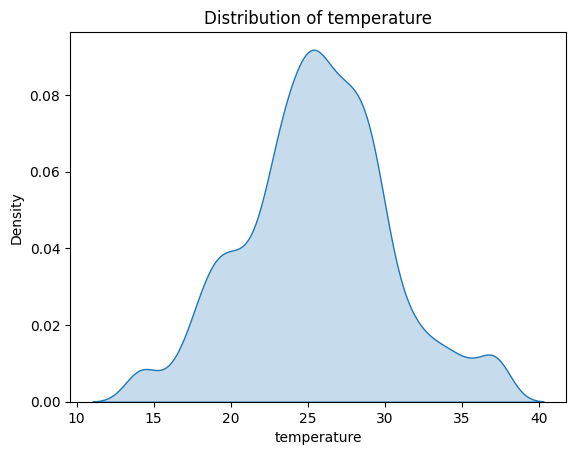

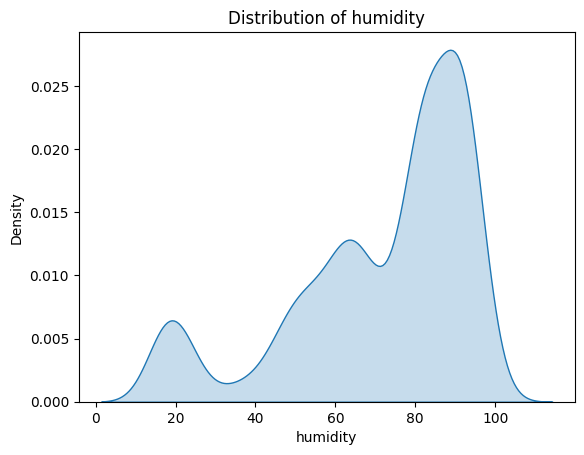

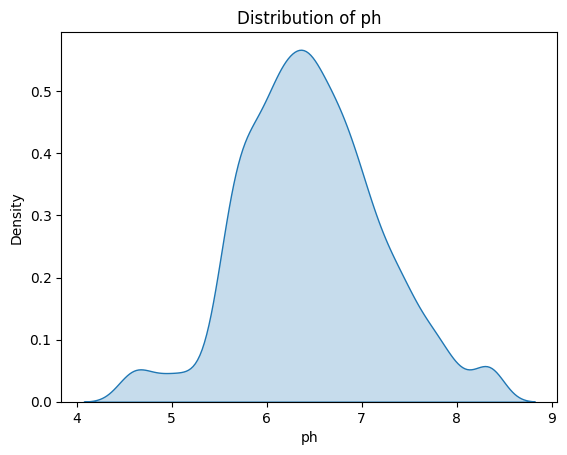

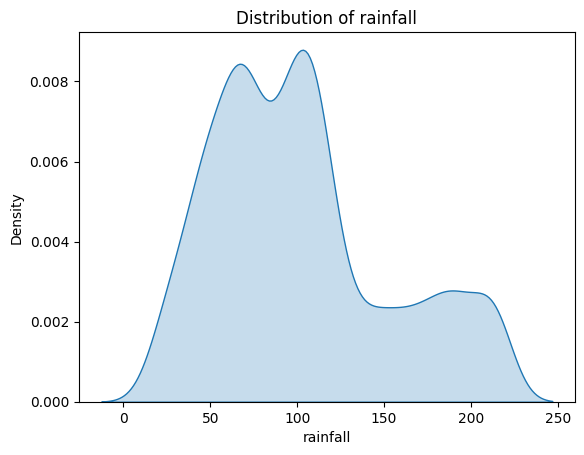

In [13]:
# KDE plots for numerical features
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

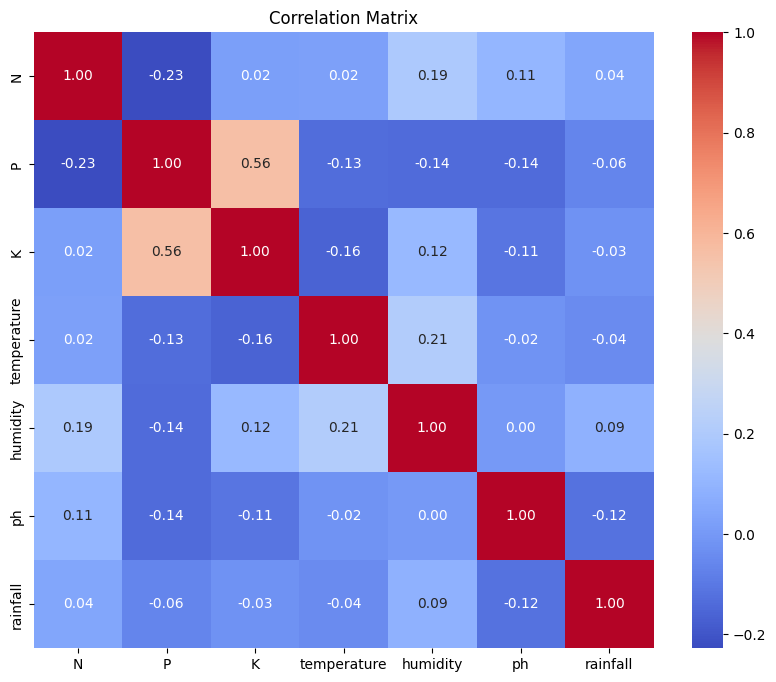

In [14]:
# Select only numeric cols
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

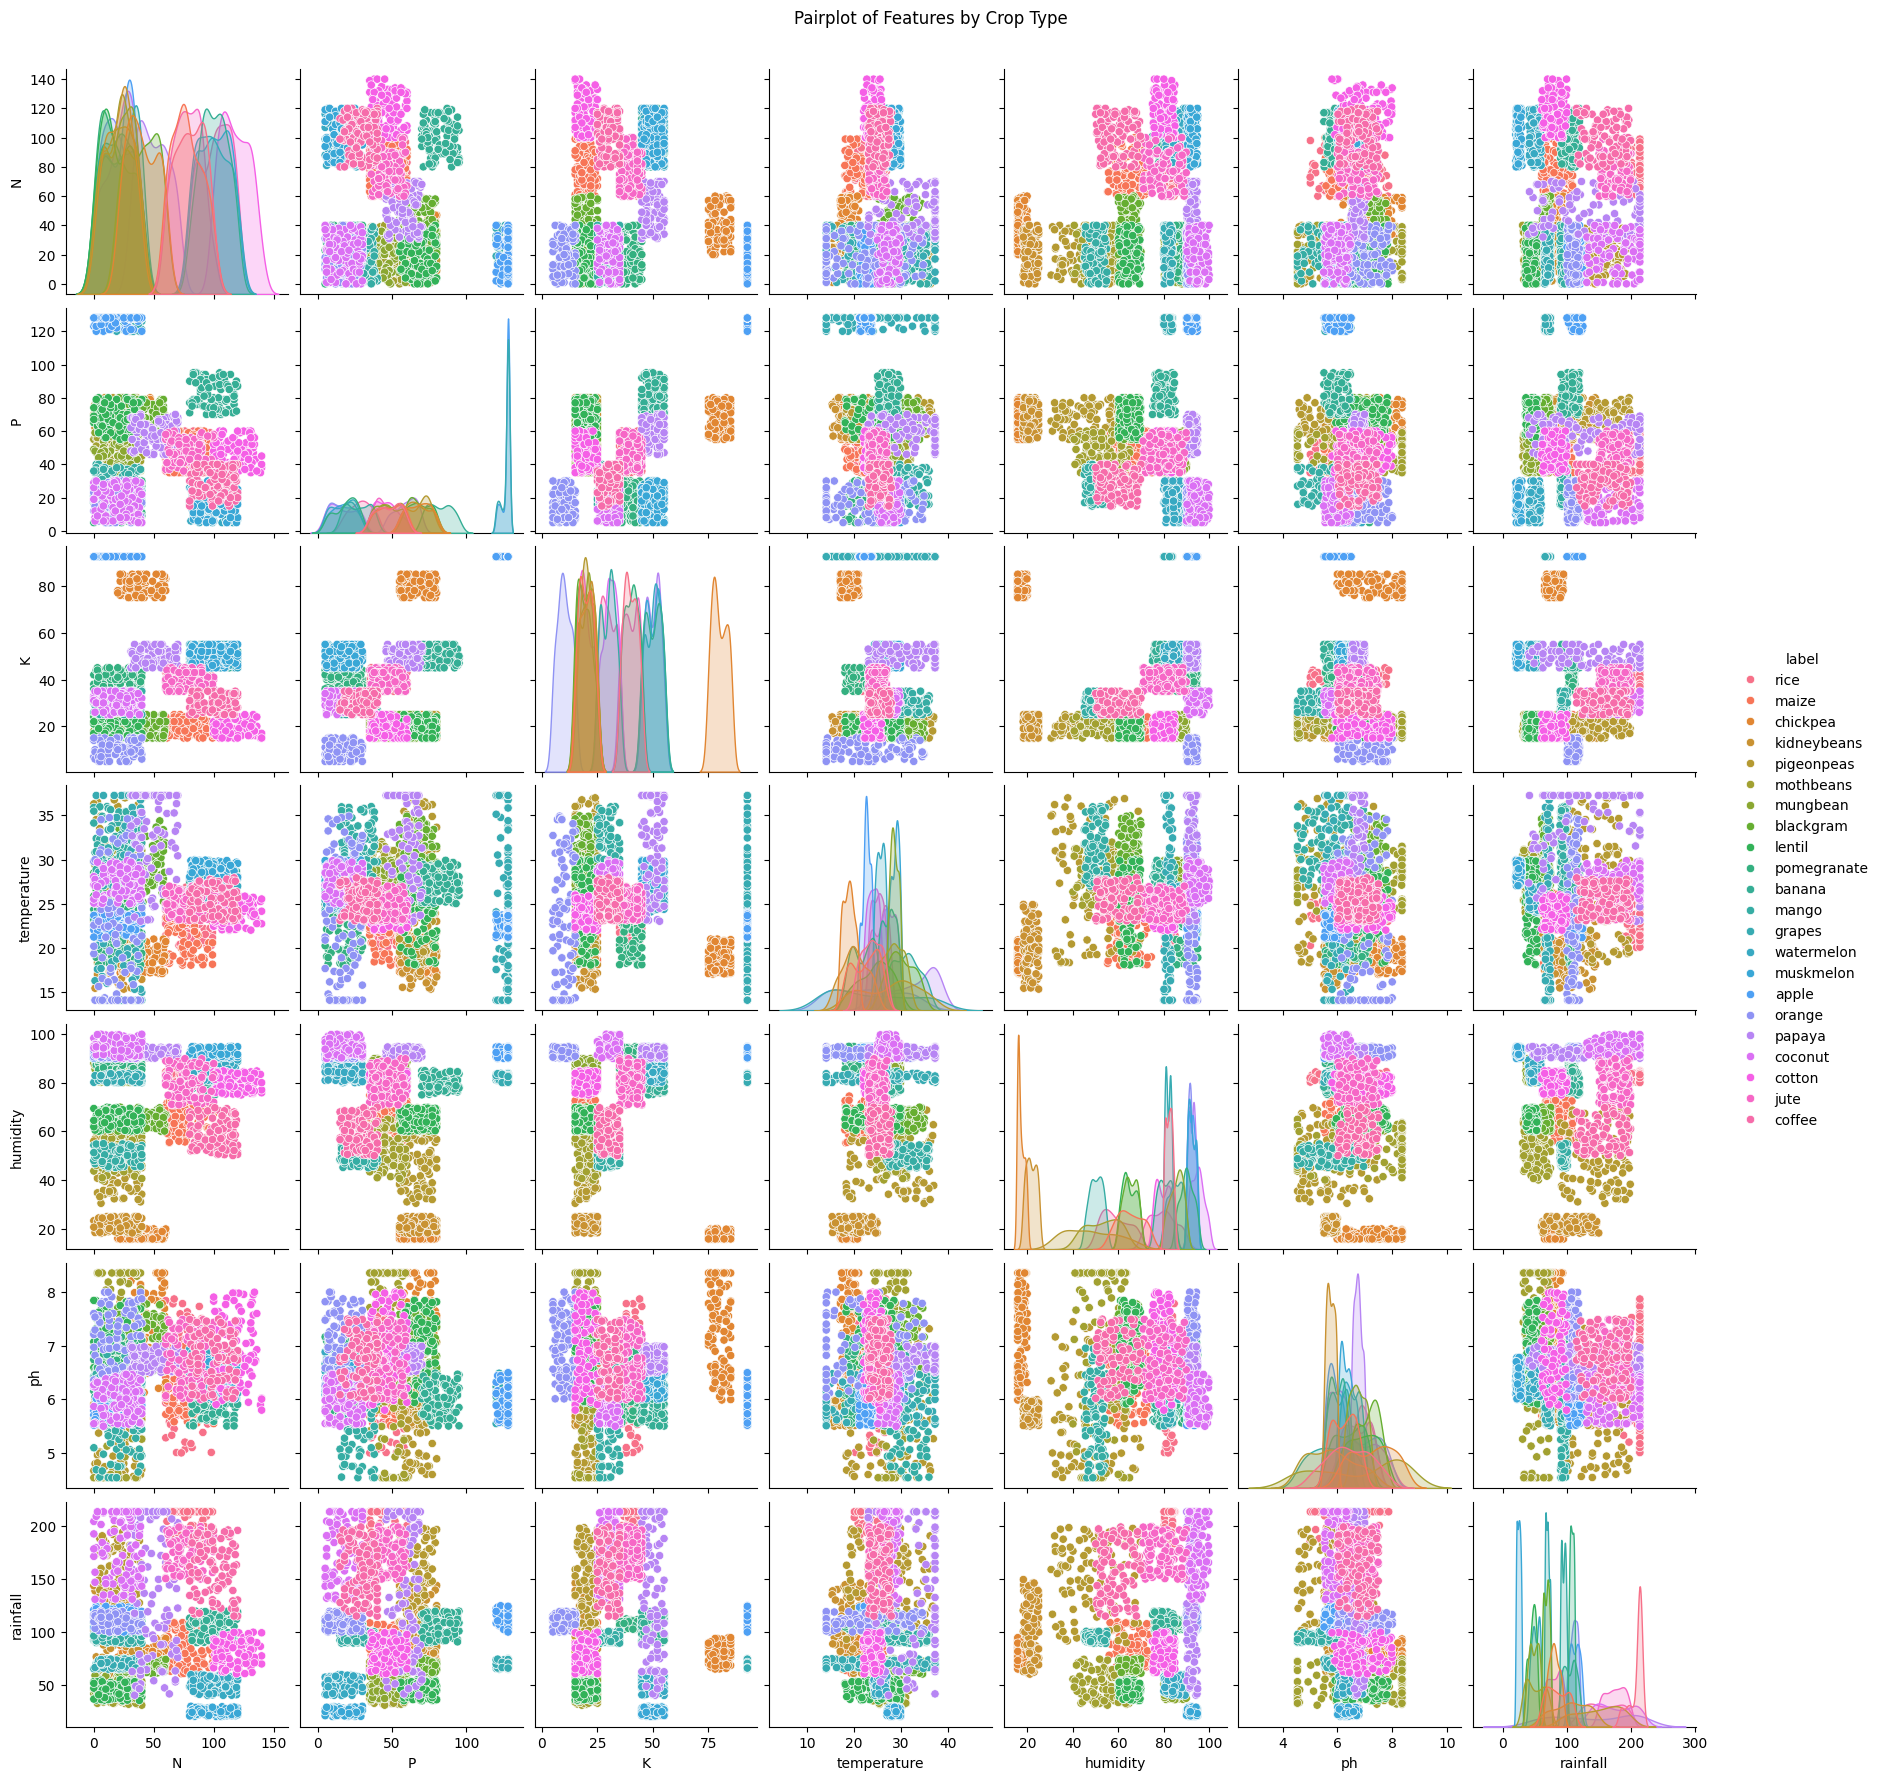

In [15]:
# Pairplot
sns.pairplot(data, vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], hue='label', palette='husl')
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

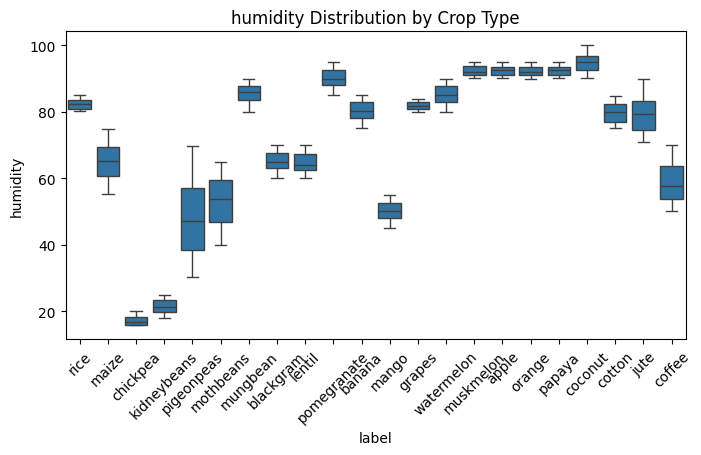

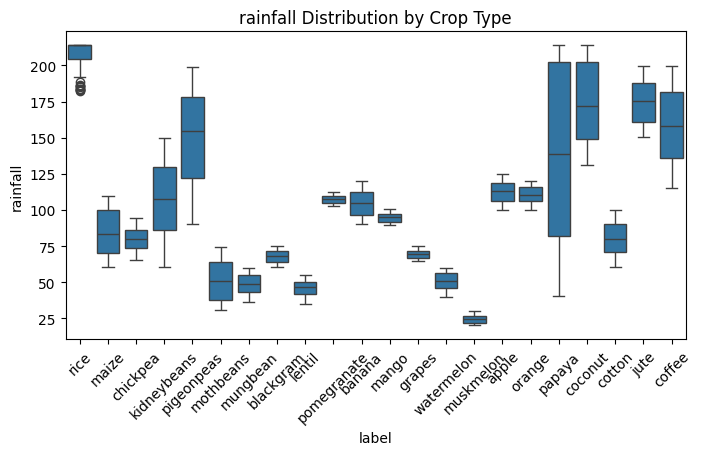

In [16]:
# Boxplots of features grouped by crop
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

In [17]:
crop_mean = data.groupby('label').mean()
print(crop_mean)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu')
plt.title('Average Feature Values by Crop Type')
plt.show()

                  N       P      K  temperature   humidity        ph  \
label                                                                  
apple         20.80  126.66  92.50    22.630942  92.333383  5.929663   
banana       100.23   82.01  50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47  19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79  79.92    18.872847  17.114928  7.295763   
coconut       21.98   16.93  30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74  29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24  19.56    23.988958  79.843474  6.912675   
grapes        23.18  126.46  92.50    24.084137  81.875228  6.025937   
jute          78.40   46.86  39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54  20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36  19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44  19.79    22.389204  65.092249  6.24

In [18]:
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
X = pd.DataFrame(scaled_features, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
y = data['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def train_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Confusion Matrix
    matrix = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted No", "Predicted Yes"],
                yticklabels=["Actual No", "Actual Yes"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Accuracy Comparison for Overfitting Check
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy    : {test_accuracy:.4f}")
    acc_gap = train_accuracy - test_accuracy
    print(f"Accuracy Gap     : {acc_gap:.4f}")

    if acc_gap > 0.05:
        print("⚠️ Warning: Model may be overfitting (large gap between train and test accuracy).")
    else:
        print("✅ Model is likely generalizing well (no significant overfitting).")

    # Score Table
    print("\nScore Table:")
    score_df = pd.DataFrame([[test_accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df


Confusion Matrix:


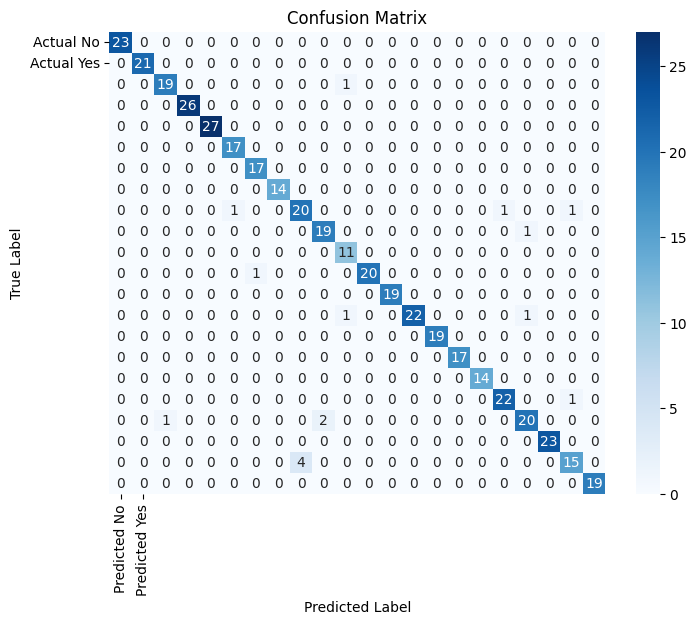


Training Accuracy: 0.9807
Test Accuracy    : 0.9636
Accuracy Gap     : 0.0170
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512

In [33]:
model=LogisticRegression()
result=train_model(model,X_train, y_train, X_test, y_test)
result.index=["Logistic Regression"]
result

In [34]:
# Decision Tree

model = DecisionTreeClassifier()
dt_result = train_model(model, X_train, y_train, X_test, y_test)
dt_result.index = ["Decision Tree"]
result = pd.concat([result, dt_result])
display(result)

Confusion Matrix:



Training Accuracy: 1.0000
Test Accuracy    : 0.9818
Accuracy Gap     : 0.0182
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512
Decision Tree        0.981818   0.982331  0.981818  0.981809

Confusion Matrix:


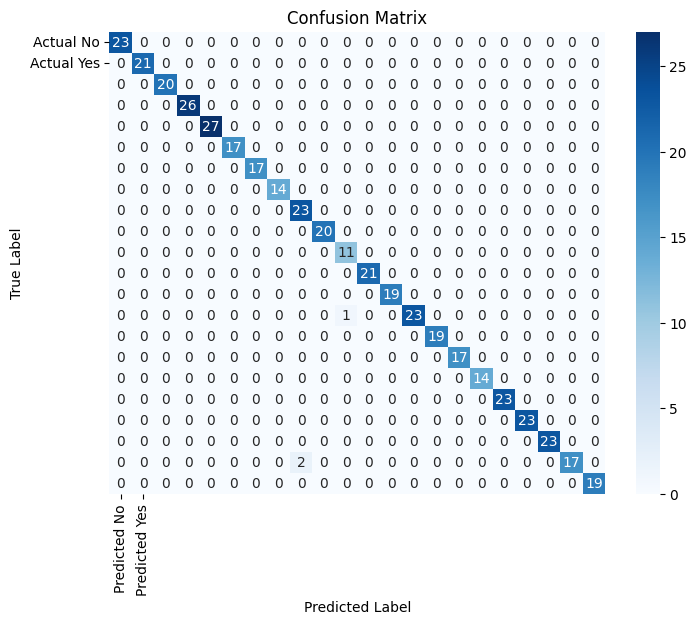


Training Accuracy: 1.0000
Test Accuracy    : 0.9932
Accuracy Gap     : 0.0068
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512
Decision Tree        0.981818   0.982331  0.981818  0.981809
Random Forest        0.993182   0.993735  0.993182  0.993175

In [35]:
model = RandomForestClassifier()
rf_result = train_model(model, X_train, y_train, X_test, y_test)
rf_result.index = ["Random Forest"]
result = pd.concat([result, rf_result])
display(result)


In [36]:
model = GradientBoostingClassifier()
gb_result = train_model(model, X_train, y_train, X_test, y_test)
gb_result.index = ["Gradient Boosting"]
result = pd.concat([result, gb_result])
display(result)

Confusion Matrix:



Training Accuracy: 1.0000
Test Accuracy    : 0.9818
Accuracy Gap     : 0.0182
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512
Decision Tree        0.981818   0.982331  0.981818  0.981809
Random Forest        0.993182   0.993735  0.993182  0.993175
Gradient Boosting    0.981818   0.982757  0.981818  0.981708

Confusion Matrix:


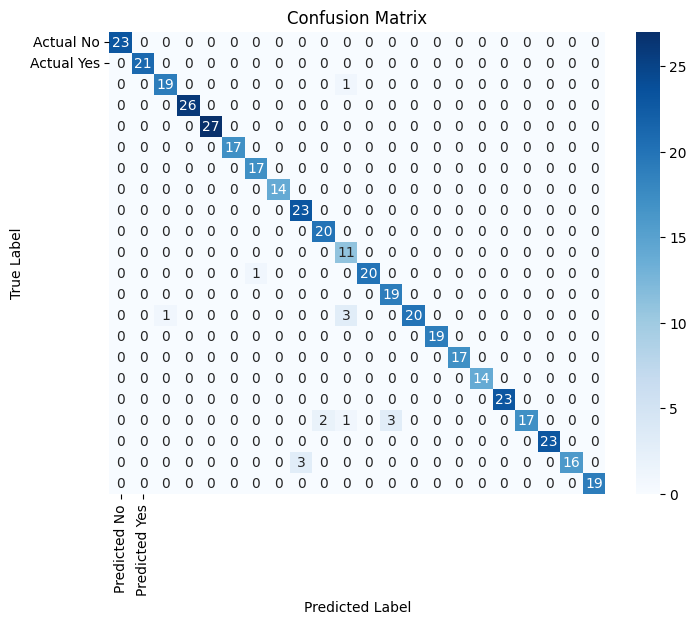


Training Accuracy: 0.9915
Test Accuracy    : 0.9659
Accuracy Gap     : 0.0256
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512
Decision Tree        0.981818   0.982331  0.981818  0.981809
Random Forest        0.993182   0.993735  0.993182  0.993175
Gradient Boosting    0.981818   0.982757  0.981818  0.981708
KNN                  0.965909   0.971716  0.965909  0.965804
Naive Bayes          0.995455   0.995818  0.995455  0.995423
XGB                  0.986364   0.987091  0.986364  0.986340
Naive Bayes          0.995455   0.995818  0.995455  0.995423
KNN                  0.965909   0.971716  0.965909  0.965804

In [41]:
model = KNeighborsClassifier()
knn_result = train_model(model, X_train, y_train, X_test, y_test)
knn_result.index = ["KNN"]
result = pd.concat([result, knn_result])
display(result)

Confusion Matrix:


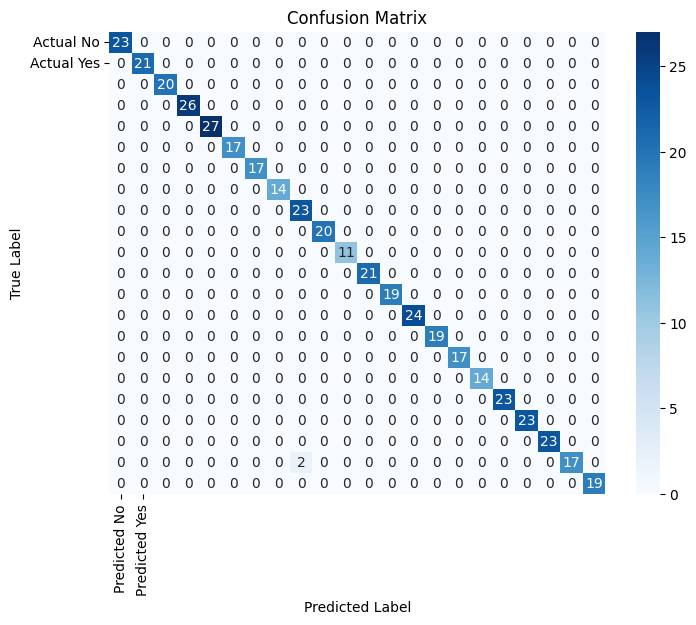


Training Accuracy: 0.9955
Test Accuracy    : 0.9955
Accuracy Gap     : 0.0000
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512
Decision Tree        0.981818   0.982331  0.981818  0.981809
Random Forest        0.993182   0.993735  0.993182  0.993175
Gradient Boosting    0.981818   0.982757  0.981818  0.981708
KNN                  0.965909   0.971716  0.965909  0.965804
Naive Bayes          0.995455   0.995818  0.995455  0.995423
XGB                  0.986364   0.987091  0.986364  0.986340
Naive Bayes          0.995455   0.995818  0.995455  0.995423

In [40]:
# Train the naive bayes Model
naive_model = GaussianNB()
naive = train_model(naive_model, X_train, y_train, X_test, y_test)
naive.index = ["Naive Bayes"]
result = pd.concat([result, naive])

result

Confusion Matrix:


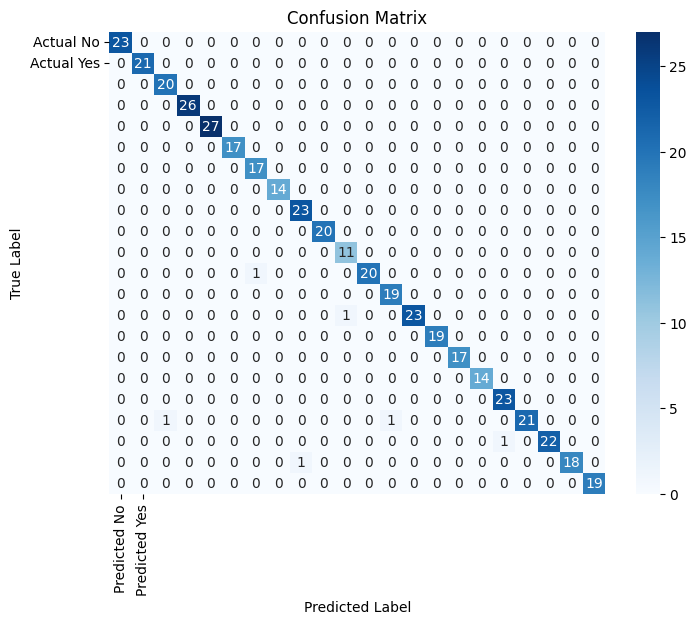


Training Accuracy: 1.0000
Test Accuracy    : 0.9864
Accuracy Gap     : 0.0136
✅ Model is likely generalizing well (no significant overfitting).

Score Table:


accuracy  precision    recall        f1
Logistic Regression  0.963636   0.964442  0.963636  0.963512
Decision Tree        0.981818   0.982331  0.981818  0.981809
Random Forest        0.993182   0.993735  0.993182  0.993175
Gradient Boosting    0.981818   0.982757  0.981818  0.981708
KNN                  0.965909   0.971716  0.965909  0.965804
Naive Bayes          0.995455   0.995818  0.995455  0.995423
XGB                  0.986364   0.987091  0.986364  0.986340

In [39]:
# train the XGB model
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier()
xgb = train_model(xgb_model, X_train, y_train_encoded, X_test, y_test_encoded)
xgb.index = ["XGB"]
result = pd.concat([result, xgb])

result

In [43]:
import pickle

with open('naive_model.pkl', 'wb') as file:
    pickle.dump(naive_model, file)
